R^2 score на тренировочных данных: 0.7749178425751908
R^2 score на тестовых данных: 0.7296738412715471


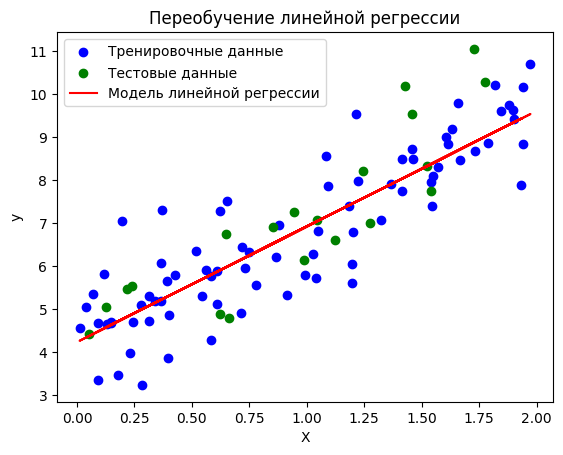

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Создаем синтетические данные
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)  # y = 4 + 3x + шум

# Разделяем данные на тренировочные и тестовые
X_train, X_test = X[:80], X[80:]
y_train, y_test = y[:80], y[80:]

# Обучаем линейную регрессию на тренировочных данных
model = LinearRegression()
model.fit(X_train, y_train)

# Делаем предсказания на тренировочных и тестовых данных
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Вычисляем R^2 score для оценки модели
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'R^2 score на тренировочных данных: {r2_train}')
print(f'R^2 score на тестовых данных: {r2_test}')

# Визуализируем результаты
plt.scatter(X_train, y_train, color='blue', label='Тренировочные данные')
plt.scatter(X_test, y_test, color='green', label='Тестовые данные')
plt.plot(X, model.predict(X), color='red', label='Модель линейной регрессии')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Переобучение линейной регрессии')
plt.show()
